###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     1297447


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 0. Preparation

In [62]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

In [63]:
# Read training and testing dataset from csv file
train_dataset = pd.read_csv('winequality-train.csv')
test_dataset = pd.read_csv('winequality-test.csv')

## 1. K-NN classifier

In [65]:
# Seperate features and labels in training and testing dataset
train_features = train_dataset.drop('quality', axis = 1)
train_labels = train_dataset['quality']

test_features = test_dataset.drop('quality', axis = 1)
test_labels = test_dataset['quality']


# Calculate euclidean distance with other features
def calc_euclidean_distance(instance, train_features):
    return np.sqrt(((instance - train_features) ** 2).sum(axis = 1))


# Get neighbors labels from given instance
def get_neighbors_labels(distance, train_labels, k):
    
    # Get k nearest neighbors
    neighbors = distance.sort_values()[:k]
    neighbors_labels = train_labels.loc[neighbors.index].value_counts()

    return neighbors_labels


# Predict one instance's label given k and features
def predict_instance(instance, train_features, train_labels, k):
    
    # Calculate euclidean distance
    distance = calc_euclidean_distance(instance, train_features)
    
    # Get neighbors labels
    neighbors_labels = get_neighbors_labels(distance, train_labels, k)
    
    # Use majority vote to pick the label with most votes
    # If tie, use 1-NN
    if neighbors_labels.get(0) == neighbors_labels.get(1):
        neighbors_labels = get_neighbors_labels(distance, train_labels, k = 1)
        label = neighbors_labels.index[0]
    else:
        label = neighbors_labels.sort_values(ascending = False).index[0]
    
    return label


# Predict the quality of wine using K-NN
def predict(test_features, train_features, train_labels, k):

    predictions = {}

    # Predict each instance in test dataset
    for i, instance in test_features.iterrows():
        label = predict_instance(instance, train_features, train_labels, k)
        predictions[i] = label

    return pd.Series(predictions)

## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [66]:
# Compare the prediction with the actual label
prediction = predict(test_features, train_features, train_labels, k = 1)
(prediction == test_labels).mean()

0.7644444444444445

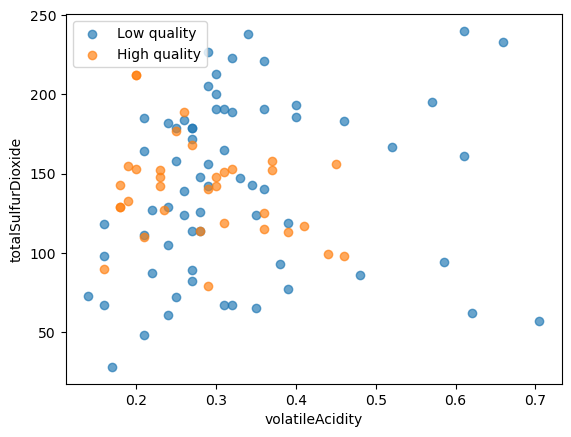

In [60]:
# Specify the features to plot
x_axis = 'volatileAcidity'
y_axis = 'totalSulfurDioxide'

# Randomly select 100 samples from training dataset
subset = train_features.sample(100)[[x_axis, y_axis]]
subset['quality'] = train_labels.loc[subset.index]

# Plot the samples
plt.scatter(
    x = subset.loc[subset['quality'] == 0, x_axis],
    y = subset.loc[subset['quality'] == 0, y_axis],
    label = 'Low quality',
    alpha = 0.67
)
plt.scatter(
    x = subset.loc[subset['quality'] == 1, x_axis],
    y = subset.loc[subset['quality'] == 1, y_axis],
    label = 'High quality',
    alpha = 0.67
)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.legend()
plt.show()

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.